# Task 4 solution

This notebook includes the following sections:
1. Download Sentinel-2 for a given AOI from GEE
2. Open and visualize Sentinel-2
3. Load saved classifier 
4. Run prediction and visualize the output

Reference
1. [Assignment description](https://drive.google.com/file/d/1aSpl8BYOGjBM-OWy9YsBtTAFjozSG93A/view?usp=sharing)
2. [PASTIS dataset documentation](https://drive.google.com/file/d/1nZPaLxMImodDr3D9ydZAsxr9duKRT455/view?usp=sharing)
3. [Sentinel-2](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR_HARMONIZED#bands)


#### **Download Sentinel-2**

GEE script for downloading Sentinel-2
https://code.earthengine.google.com/22bc8c29a7bd0795b424acd7d9c84b1a

In [8]:
# Uncomment this if you are running the script on Colab
# ! pip install rasterio 

In [6]:
# Mount google drive if you are running the script on Colab and using the data saved in google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **Open and visualize Sentinel-2**

In [9]:
# Open tiff as numpy array
import rasterio
src = rasterio.open("/content/drive/MyDrive/GEE Exports/S2_france.tif")
s2_arr = src.read()  # read all raster values

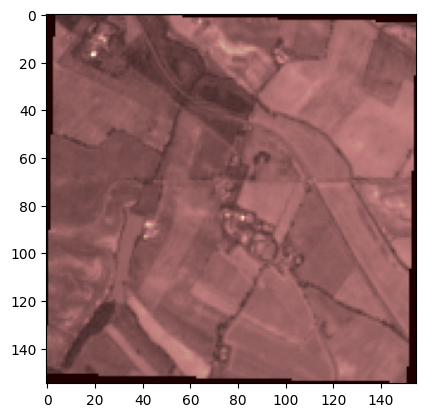

In [24]:
# Visualization
from matplotlib import pyplot as plt
plt.imshow(src.read(1), cmap='pink')
plt.show()

In [11]:
s2_arr.shape

(10, 155, 155)

In [14]:
# reshape
import numpy as np
s2_input = np.transpose(s2_arr, (1, 2, 0)).reshape(-1, 10)

In [15]:
s2_input.shape

(24025, 10)

#### **Load saved classifier**

You can use the following line to save the classifier trained in previous

```dump(classifier, '/content/drive/MyDrive/TA/week2/classifier.joblib')```

In [16]:
from joblib import dump, load
classifier = load('/content/drive/MyDrive/TA/week2/classifier.joblib') 

#### **Prediction**

In [17]:
def get_positive_class_probabilities(clf, data):
    pb = clf.predict_proba(data)
    assert pb.shape[1] == 2, "The classifier predicts more than 2 classes."
    return pb[:,1]

In [18]:
pred_prob = get_positive_class_probabilities(classifier, s2_input)

In [19]:
pred_prob

array([0.50011378, 0.50011378, 0.50011378, ..., 0.50011378, 0.50011378,
       0.50011378])

In [20]:
pred_prob.shape

(24025,)

Raw probabilities


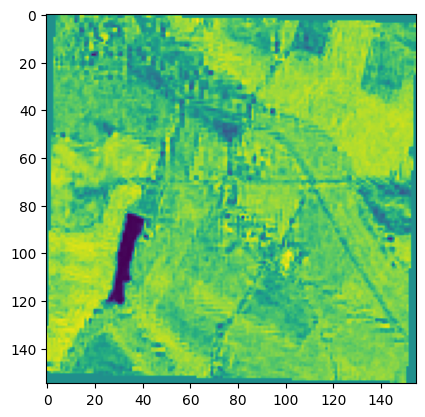

Binarized classes at threshold of 0.6


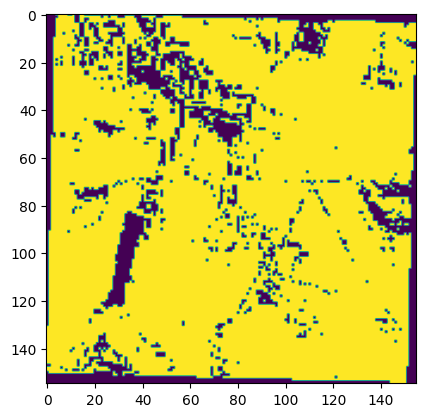

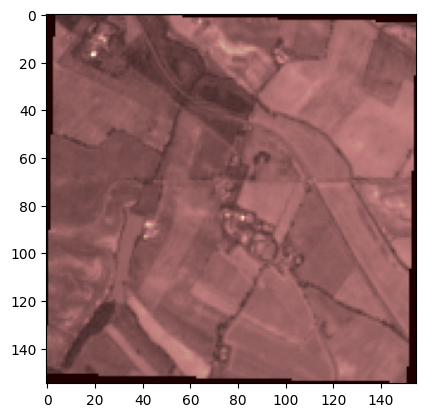

In [23]:
# Show prediction for one image
tpb = pred_prob.copy().reshape(-1, 155, 155)
print("Raw probabilities")
plt.imshow(tpb[0])
plt.show()

# Binarize using a threshold
threshold = 0.6
print(f"Binarized classes at threshold of {threshold}")
tpb[tpb >= threshold] = 1
tpb[tpb < threshold] = 0
plt.imshow(tpb[0])
plt.show()

# Visualization
plt.imshow(src.read(1), cmap='pink')
plt.show()